<a href="https://colab.research.google.com/github/sbesinski/kaggle_ML/blob/main/breast_cancer_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from sklearn.datasets import load_breast_cancer

In [2]:
dataset = load_breast_cancer()
print(dataset['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

In [3]:
dataset.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [4]:
dataset['feature_names']

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [5]:
dataset['target_names']

array(['malignant', 'benign'], dtype='<U9')

In [6]:
is_malignant = (~dataset['target'].astype(bool)).astype(int)

In [7]:
is_malignant[:-1]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,

In [8]:
df = pd.concat([
    pd.DataFrame(dataset['data'], columns=dataset['feature_names']),
    pd.DataFrame(is_malignant, columns=[dataset['target_names'][0]])],
    axis=1
)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier

target_name = 'malignant'
feature_names = df.columns[:-1]
feature_names

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')

In [11]:
from sklearn.model_selection import train_test_split

X = df[feature_names]
y = df[[target_name]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [12]:
X.shape, y.shape

((569, 30), (569, 1))

In [13]:
scaler = StandardScaler()
features_scaled = scaler.fit_transform(df[feature_names])

pipeline = Pipeline([
    ('scaler', StandardScaler(with_mean=True, with_std=True)),
    ('model', DecisionTreeClassifier())
])

model = pipeline.fit(X_train, y_train)
predicted_train_set = model.predict(X_train)
predicted_test_set = model.predict(X_test)

In [14]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

print(accuracy_score(y_train, predicted_train_set))
print(accuracy_score(y_test, predicted_test_set))
print(precision_score(y_train, predicted_train_set))
print(precision_score(y_test, predicted_test_set))
print(recall_score(y_train, predicted_train_set))
print(recall_score(y_test, predicted_test_set))

1.0
0.9148936170212766
1.0
0.8695652173913043
1.0
0.8955223880597015


In [15]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
print("Cross-validation scores:", scores)

Cross-validation scores: [0.90350877 0.92105263 0.92982456 0.94736842 0.90265487]


In [16]:
# Access the model from the pipeline to extract feature importances
model = pipeline.named_steps['model']
feature_importances = model.feature_importances_
feature_importances

array([0.        , 0.03148899, 0.        , 0.        , 0.00742256,
       0.        , 0.        , 0.72319377, 0.00835038, 0.        ,
       0.        , 0.        , 0.        , 0.01403804, 0.00262909,
       0.        , 0.        , 0.00974211, 0.        , 0.01088333,
       0.03335843, 0.01819436, 0.05635808, 0.00362693, 0.01087707,
       0.        , 0.05350723, 0.00742256, 0.        , 0.00890707])

Text(0.5, 1.0, 'Istotność zmiennych')

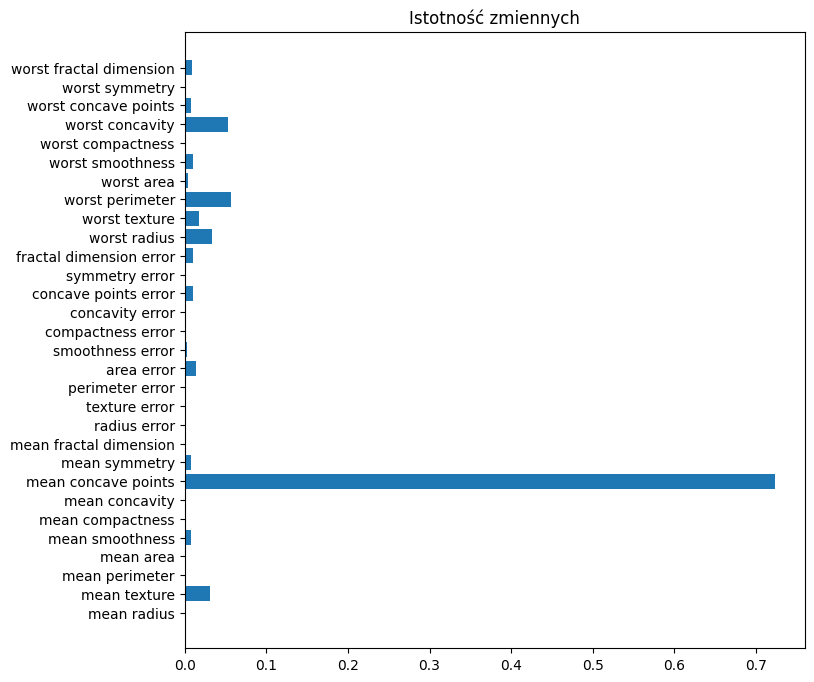

In [17]:
plt.figure(figsize=(8, 8))
plt.barh(feature_names, feature_importances)
plt.title('Istotność zmiennych')

In [18]:
is_benign = (~dataset['target'].astype(bool)).astype(int)

In [19]:
df = pd.concat([
    pd.DataFrame(dataset['data'], columns=dataset['feature_names']),
    pd.DataFrame(is_benign, columns=[dataset['target_names'][1]])],
    axis=1
)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [21]:
feature_names = df.columns[:-1]
target_name = 'benign'
feature_names

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

X = df[feature_names]
y = df[[target_name]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

scaler = StandardScaler()
features_scaled = scaler.fit_transform(df[feature_names])

pipeline = Pipeline([
    ('scaler', StandardScaler(with_mean=True, with_std=True)),
    ('model', DecisionTreeClassifier(max_depth=5, random_state=42))
])

model = pipeline.fit(X_train, y_train)
predicted_train_set = model.predict(X_train)
predicted_test_set = model.predict(X_test)

metrics = {
    "Accuracy": accuracy_score(y_train, predicted_train_set),
    "Precision": precision_score(y_train, predicted_train_set),
    "Recall": recall_score(y_train, predicted_train_set),
    "F1 Score": f1_score(y_train, predicted_train_set),
    "ROC AUC": roc_auc_score(y_train, predicted_train_set),
}

for metric, value in metrics.items():
    print(f"{metric}: {value:.4f}")

Accuracy: 0.9921
Precision: 0.9931
Recall: 0.9862
F1 Score: 0.9896
ROC AUC: 0.9910


In [23]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
print("Cross-validation scores:", scores)

Cross-validation scores: [0.89473684 0.9122807  0.92982456 0.94736842 0.91150442]


In [24]:
# Access the model from the pipeline to extract feature importances
model = pipeline.named_steps['model']
feature_importances = model.feature_importances_
feature_importances

array([0.0091871 , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.74593043, 0.        , 0.        ,
       0.        , 0.02551973, 0.        , 0.01447939, 0.00271174,
       0.        , 0.        , 0.01004839, 0.        , 0.0112255 ,
       0.03440719, 0.04428185, 0.05812993, 0.        , 0.01121904,
       0.        , 0.03285969, 0.        , 0.        , 0.        ])

Text(0.5, 1.0, 'Istotność zmiennych')

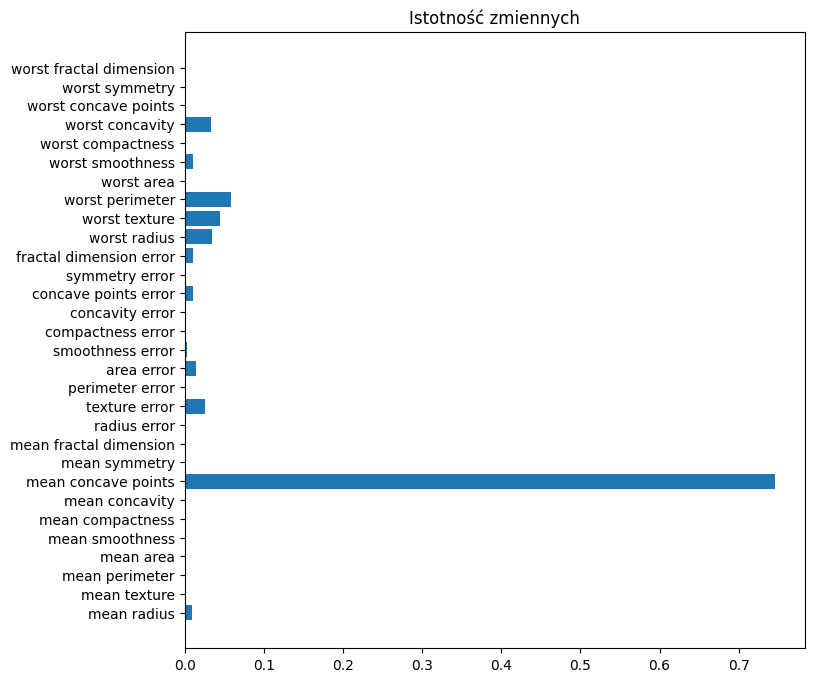

In [25]:
plt.figure(figsize=(8, 8))
plt.barh(feature_names, feature_importances)
plt.title('Istotność zmiennych')